In [71]:
import numpy as np
from matplotlib import pyplot as plt
import time

In [73]:
# Insertion Sort
def insertion_sort(arr, metadata=None):
    metadata = metadata or {}
    metadata['insertion_comparisons'] = metadata.get('insertion_comparisons', 0)
    metadata['insertion_swaps'] = metadata.get('insertion_swaps', 0)
    start = time.perf_counter_ns()
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0:
            metadata['insertion_comparisons'] += 1
            if arr[j] <= key:
                break
            arr[j + 1] = arr[j]
            metadata['insertion_swaps'] += 1
            j -= 1
        arr[j + 1] = key
    end = time.perf_counter_ns()
    metadata["insertion_us"] = (end - start) / 1_000
    return arr, metadata

# Merge Sort
def merge_sort(arr, metadata=None):
    metadata = metadata or {}
    metadata['merge_comparisons'] = metadata.get('merge_comparisons', 0)
    metadata['merge_swaps'] = metadata.get('merge_swaps', 0)
    start = time.perf_counter_ns()
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L, metadata)
        merge_sort(R, metadata)

        i = j = k = 0

        while i < len(L) and j < len(R):
            metadata['merge_comparisons'] += 1
            if L[i] < R[j]:
                arr[k] = L[i]
                metadata['merge_swaps'] += 1
                i += 1
            else:
                arr[k] = R[j]
                metadata['merge_swaps'] += 1
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            metadata['merge_swaps'] += 1
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            metadata['merge_swaps'] += 1
            j += 1
            k += 1

    end = time.perf_counter_ns()
    metadata["merge_us"] = (end - start) / 1_000
    return arr, metadata

# Heap Sort
def heapify(arr, n, i, metadata=None):
    metadata = metadata or {}
    metadata['heap_comparisons'] = metadata.get('heap_comparisons', 0)
    metadata['heap_swaps'] = metadata.get('heap_swaps', 0)
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    metadata['heap_comparisons'] += 1
    if l < n and arr[l] > arr[largest]:
        largest = l

    metadata['heap_comparisons'] += 1
    if r < n and arr[r] > arr[largest]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        metadata['heap_swaps'] += 1
        heapify(arr, n, largest, metadata)

def heap_sort(arr, metadata=None):
    metadata = metadata or {}
    metadata['heap_comparisons'] = metadata.get('heap_comparisons', 0)
    metadata['heap_swaps'] = metadata.get('heap_swaps', 0)
    start = time.perf_counter_ns()
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i, metadata)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        metadata['heap_swaps'] += 1
        heapify(arr, i, 0, metadata)

    end = time.perf_counter_ns()
    metadata["heap_us"] = (end - start) / 1_000
    return arr, metadata

# Quick Sort
def quick_sort(arr, metadata=None):
    IS_FIRST_CALL = metadata is None
    metadata = metadata or {}
    metadata['quick_comparisons'] = metadata.get('quick_comparisons', 0)
    metadata['quick_swaps'] = metadata.get('quick_swaps', 0)
    start = time.perf_counter_ns()
    if len(arr) <= 1:
        return arr, None
    else:
        # Pivot at first element for worst case scenario
        pivot = arr[0]#arr[len(arr) // 2]
        idxFromLeft = None
        idxFromRight = None
        while idxFromLeft is None or idxFromLeft < idxFromRight:
            idxFromLeft = 1
            while idxFromLeft < len(arr):
                metadata['quick_comparisons'] += 1
                if arr[idxFromLeft] >= pivot:
                    break
                idxFromLeft += 1
            idxFromRight = len(arr) - 1
            while idxFromRight > 0:
                metadata['quick_comparisons'] += 1
                if arr[idxFromRight] <= pivot:
                    break
                idxFromRight -= 1
            if idxFromLeft < idxFromRight:
                arr[idxFromLeft], arr[idxFromRight] = arr[idxFromRight], arr[idxFromLeft]
                metadata['quick_swaps'] += 1
        arr[0], arr[idxFromRight] = arr[idxFromRight], arr[0]
        metadata['quick_swaps'] += 1
        left, _ = quick_sort(arr[:idxFromRight], metadata)
        right, _ = quick_sort(arr[idxFromRight + 1:], metadata)
        if IS_FIRST_CALL:
            end = time.perf_counter_ns()
            metadata["quick_us"] = (end - start) / 1_000

        return left + [arr[idxFromRight]] + right, metadata

# Example usage
data = [i for i in range(10)]
np.random.shuffle(data)
print("Original array:", data)

print("Insertion Sort:", insertion_sort(data.copy()))
print("Merge Sort:", merge_sort(data.copy()))
print("Heap Sort:", heap_sort(data.copy()))
print("Quick Sort:", quick_sort(data.copy()))

Original array: [7, 3, 0, 1, 5, 2, 4, 8, 9, 6]
Insertion Sort: ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], {'insertion_comparisons': 21, 'insertion_swaps': 14, 'insertion_us': 24.7})
Merge Sort: ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], {'merge_comparisons': 21, 'merge_swaps': 34, 'merge_us': 47.4})
Heap Sort: ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], {'heap_comparisons': 66, 'heap_swaps': 28, 'heap_us': 41.9})
Quick Sort: ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], {'quick_comparisons': 49, 'quick_swaps': 9, 'quick_us': 41.8})


Text(0.5, 1.0, 'Sorting Algorithm Comparisons')

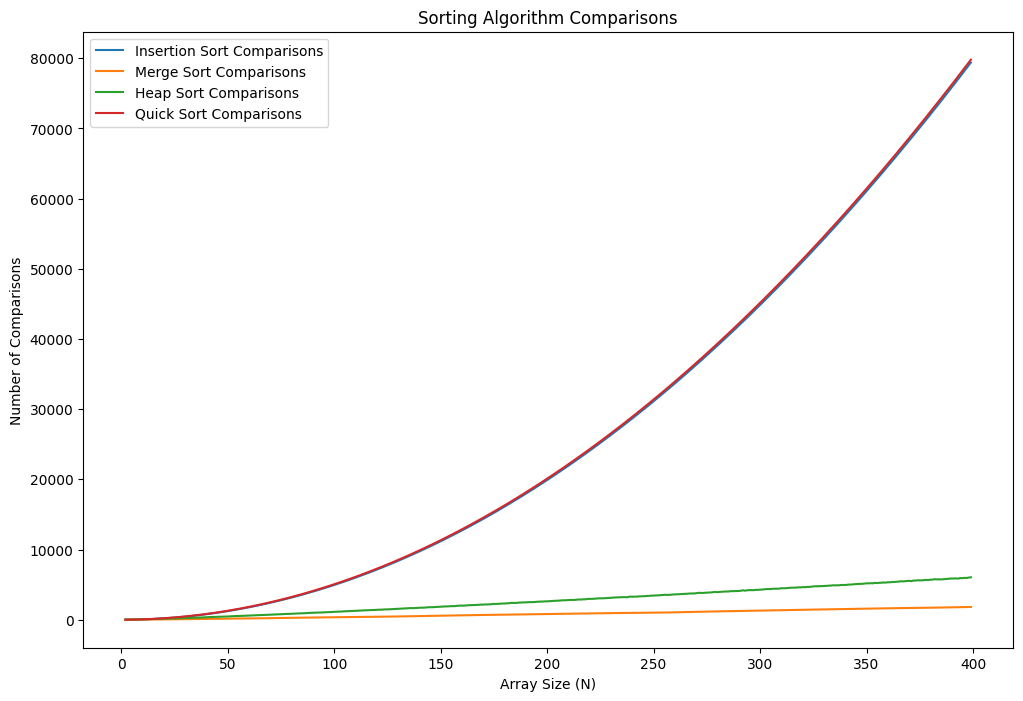

In [81]:
N = list(range(2,400))
results = {'insertion': [], 'merge': [], 'heap': [], 'quick': []}
for n in N:
    data = [i for i in range(n)]
    np.random.shuffle(data)
    # reverse sort the list to create a worst-case scenario
    data.sort(reverse=True)
    for sort in [insertion_sort, merge_sort, heap_sort, quick_sort]:
        sorted_arr, metadata = sort(data.copy())
        key = list(metadata.keys())[0].split('_')[0]
        results[key].append(metadata[f'{key}_comparisons']) # {key}_us

# Plotting the results
plt.figure(figsize=(12, 8))
for key, values in results.items():
    plt.plot(N, values, label=f'{key.capitalize()} Sort Comparisons')
plt.legend()
plt.xlabel('Array Size (N)')
plt.ylabel('Number of Comparisons')
plt.title('Sorting Algorithm Comparisons')

In [82]:
def estimate_complexity(N:list, ops:list):
    common_complexities = {
        'O(n)': lambda n: n,
        'O(n log n)': lambda n: n * np.log2(n),
        'O(n^2)': lambda n: n**2,
        'O(log n)': lambda n: np.log2(n),
    }
    estimates = {}
    for name, func in common_complexities.items():
        estimated_ops = [func(n) for n in N]
        scaling_factor = np.mean([a / b for a, b in zip(ops, estimated_ops)])
        estimated_ops = [scaling_factor * e for e in estimated_ops]
        error = np.mean([(a - b) ** 2 for a, b in zip(ops, estimated_ops)])
        estimates[name] = error
    estimates = {k: round(np.log(v), 1) for k, v in estimates.items()}
    best_fit = min(estimates, key=estimates.get)
    return best_fit, estimates

for key, values in results.items():
    best_fit, estimates = estimate_complexity(N, values)
    print(f'{key.capitalize()} Sort is {best_fit}\n- errors: {estimates}\n')

Insertion Sort is O(n^2)
- errors: {'O(n)': 19.2, 'O(n log n)': 18.9, 'O(n^2)': 11.9, 'O(log n)': 19.9}

Merge Sort is O(n log n)
- errors: {'O(n)': 9.7, 'O(n log n)': 5.4, 'O(n^2)': 14.7, 'O(log n)': 12.1}

Heap Sort is O(n log n)
- errors: {'O(n)': 12.3, 'O(n log n)': 8.1, 'O(n^2)': 16.9, 'O(log n)': 14.5}

Quick Sort is O(n^2)
- errors: {'O(n)': 19.2, 'O(n log n)': 18.9, 'O(n^2)': 11.2, 'O(log n)': 19.9}



# DotNet results:

Insertion Sort is O(n^2)
- errors: {'O(n)': 7.3, 'O(n log n)': 7.0, 'O(n^2)': 4.3, 'O(log n)': 8.0}

Merge Sort is O(n)
- errors: {'O(n)': 5.8, 'O(n log n)': 5.9, 'O(n^2)': 8.5, 'O(log n)': 6.4}

Heap Sort is O(n log n)
- errors: {'O(n)': 3.9, 'O(n log n)': 2.4, 'O(n^2)': 7.2, 'O(log n)': 5.7}

Quick Sort is O(n^2)
- errors: {'O(n)': 6.6, 'O(n log n)': 6.2, 'O(n^2)': 4.3, 'O(log n)': 7.4}



Text(0.5, 1.0, 'Sorting Algorithm Comparisons')

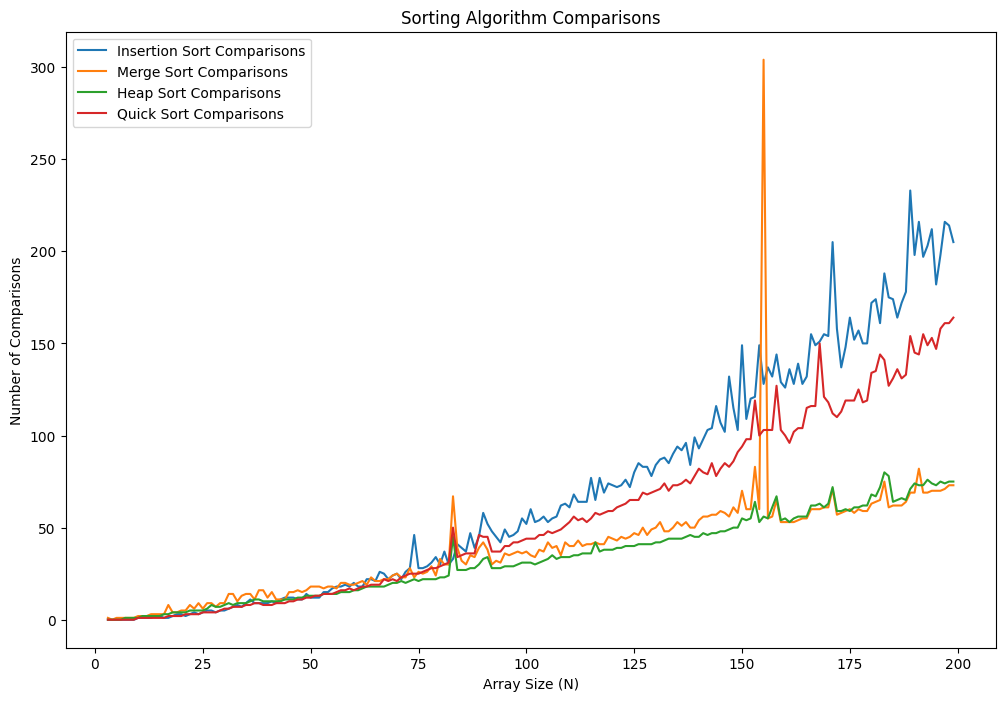

In [ ]:
import pandas as pd
print("# DotNet results:\n")
df = pd.read_csv('DotNetComparison/sorting_microseconds.csv')

plt.figure(figsize=(12, 8))
for key in df.columns:
    if key == 'N':
        continue
    # Skipping the first row since the initialization time messes up the results
    N = df.loc[1:,'N']
    values = df.loc[1:,key]
    
    best_fit, estimates = estimate_complexity(N, values)
    print(f'{key.capitalize()} Sort is {best_fit}\n- errors: {estimates}\n')

    plt.plot(N, values, label=f'{key.capitalize()} Sort Comparisons')
plt.legend()
plt.xlabel('Array Size (N)')
plt.ylabel('Number of Comparisons')
plt.title('Sorting Algorithm Comparisons')